In [8]:
import geopandas as gpd
from dbfread import DBF
import pandas as pd
from shapely.geometry import Point, LineString, Polygon

## Wczytanie danych

In [2]:
pl_railroads = gpd.read_file('data/POL_rails.shp', encoding='utf-8')
pl_railroads

,FID_rail_d,F_CODE_DES,EXS_DESCRI,FCO_DESCRI,FID_countr,ISO,ISOCOUNTRY,geometry
0,15936,Railroad,Not Usable,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.39092 54.770..."
1,15937,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.35158 54.766..."
2,15958,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.36922 54.75756, 18.37953 54.749..."
3,16046,Railroad,Unexamined/Unsurveyed,Unknown,176,POL,POLAND,"LINESTRING (18.41561 54.70772, 18.41386 54.709..."
4,16283,Railroad,Operational,Single,176,POL,POLAND,"LINESTRING (18.41561 54.70772, 18.41556 54.706..."
...,...,...,...,...,...,...,...,...
1705,38978,Railroad,Operational,Single,-1,POL,None,"LINESTRING (14.95360 51.04671, 14.95425 51.054..."
1706,39811,Railroad,Operational,Single,-1,POL,None,"MULTILINESTRING ((14.95066 51.03754, 14.95289 ..."
1707,40038,Railroad,Operational,Single,-1,POL,None,"MULTILINESTRING ((14.87928 50.93666, 14.87798 ..."
1708,40406,Railroad,Operational,Single,-1,POL,None,"LINESTRING (14.83028 50.89292, 14.83060 50.89179)"


In [3]:
pl_roads = gpd.read_file('data/POL_roads.shp', encoding='utf-8')
pl_roads

,MED_DESCRI,RTT_DESCRI,F_CODE_DES,ISO,ISOCOUNTRY,geometry
0,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (18.21214 54.82669, 18.20281 54.810..."
1,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (18.21333 54.77422, 18.20964 54.772..."
2,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.89775 54.72244, 17.90192 54.742..."
3,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.57647 54.71158, 17.58139 54.712..."
4,Without Median,Primary Route,Road,POL,POLAND,"LINESTRING (17.57647 54.71158, 17.55136 54.735..."
...,...,...,...,...,...,...
2950,Without Median,Primary Route,Road,POL,None,"LINESTRING (14.99157 51.15677, 14.99192 51.15688)"
2951,Without Median,Primary Route,Road,POL,None,"LINESTRING (14.99659 51.15071, 14.99799 51.15040)"
2952,Without Median,Primary Route,Road,POL,None,"MULTILINESTRING ((14.98147 51.13147, 14.98199 ..."
2953,Without Median,Primary Route,Road,POL,None,"MULTILINESTRING ((14.95047 51.05101, 14.95161 ..."


In [4]:
pl_adm0 = gpd.read_file('data/POL_adm0.shp', encoding='utf-8')
pl_adm1 = gpd.read_file('data/POL_adm1.shp', encoding='utf-8')
pl_adm2 = gpd.read_file('data/POL_adm2.shp', encoding='utf-8')
pl_adm2

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,181,POL,Poland,1,Łódź,1,Łódź East,Powiat,County,None,Powiat Lódzki Wschodni,"POLYGON ((19.94863 51.69453, 19.95766 51.68640..."
1,181,POL,Poland,1,Łódź,2,Łódź,Powiat,City,None,None,"POLYGON ((19.43115 51.63008, 19.39816 51.64681..."
2,181,POL,Poland,1,Łódź,3,Łask,Powiat,County,None,Powiat Laski,"POLYGON ((18.86274 51.29820, 18.86443 51.30588..."
3,181,POL,Poland,1,Łódź,4,Łęczyca,Powiat,County,None,Powiat Lęczycki,"POLYGON ((19.55936 51.99213, 19.54240 51.98181..."
4,181,POL,Poland,1,Łódź,5,Łowicz,Powiat,County,None,Powiat Lowicki,"POLYGON ((19.80733 51.91221, 19.81419 51.92760..."
...,...,...,...,...,...,...,...,...,...,...,...,...
371,181,POL,Poland,16,West Pomeranian,372,Sławno,Powiat,County,None,Powiat Sławieński,"POLYGON ((16.25050 54.34125, 16.25083 54.34125..."
372,181,POL,Poland,16,West Pomeranian,373,Stargard,Powiat,County,None,Powiat Stargardzki,"POLYGON ((14.74024 53.33474, 14.75395 53.35405..."
373,181,POL,Poland,16,West Pomeranian,374,Szczecinek,Powiat,County,None,Powiat Szczecinecki,"POLYGON ((16.94773 53.58820, 16.92182 53.59652..."
374,181,POL,Poland,16,West Pomeranian,375,Szczecin,Powiat,City,None,Stettin|Sztetëno|Stetinum,"POLYGON ((14.74024 53.33474, 14.72967 53.33179..."


In [5]:
pl_water_lines = gpd.read_file('data/POL_water_lines_dcw.shp', encoding='utf-8')
pl_water_areas = gpd.read_file('data/POL_water_areas_dcw.shp', encoding='utf-8')
pl_water_areas

,ISO,COUNTRY,F_CODE_DES,HYC_DESCRI,NAME,geometry
0,POL,Poland,Inland Water,Perennial/Permanent,UNK,"POLYGON ((22.84491 54.33083, 22.82987 54.32779..."
1,POL,Poland,Inland Water,Perennial/Permanent,STEZYCKIE JEZIORO,"POLYGON ((17.95297 54.19684, 17.94872 54.19661..."
2,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO RYDZOWKA,"POLYGON ((21.59158 54.22020, 21.58950 54.21647..."
3,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO GARCZYN,"POLYGON ((17.90364 54.12464, 17.89639 54.12355..."
4,POL,Poland,Inland Water,Perennial/Permanent,JEZIORO LUBISZEWSKIE,"POLYGON ((17.77211 54.11934, 17.76903 54.11664..."
...,...,...,...,...,...,...
1386,POL,Poland,Inland Water,Perennial/Permanent,MIEDZYBRODZKI ZBIORNIK WODNY,"POLYGON ((19.21070 49.78711, 19.20286 49.78122..."
1387,POL,Poland,Inland Water,Perennial/Permanent,ROZNOWSKIE JEZIORO,"POLYGON ((20.69736 49.76511, 20.69947 49.75670..."
1388,POL,Poland,Inland Water,Perennial/Permanent,MYCZKOWSKIE JEZIORO,"POLYGON ((22.42814 49.42736, 22.42897 49.42464..."
1389,POL,Poland,Inland Water,Perennial/Permanent,UNK,"POLYGON ((20.02431 49.22964, 20.02408 49.22600..."


In [6]:
dbf = DBF('data/POL.dbf', encoding='unicode_escape')
pl_gazz = pd.DataFrame(iter(dbf))
geometry = []
for _, row in pl_gazz.iterrows():
    geometry.append(Point(row.LONG, row.LAT))
pl_gazz = pl_gazz.drop(['LAT', 'LONG'], axis='columns')
pl_gazz = gpd.GeoDataFrame(pl_gazz, geometry=geometry)
pl_gazz.crs = "Epsg:4326"
pl_gazz = pl_gazz.to_crs(epsg=4326)
pl_gazz

,NAME,F_CLASS,F_DESIG,ADM1,geometry
0,Vysokie Skalky,T,MT,NOWY SACZ,POINT (20.56660 49.40000)
1,Pacza,T,MT,KROSNO,POINT (22.41660 49.11660)
2,Beskid,T,MT,,POINT (19.40000 49.56660)
3,Zywiec Stary,P,PPL,BIELSKO-BIALA,POINT (19.21660 49.71660)
4,Zywieckie Jezioro,H,RSV,BIELSKO-BIALA,POINT (19.20000 49.71660)
...,...,...,...,...,...
61724,Plaziny,T,MT,NOWY SACZ,POINT (21.06660 49.40000)
61725,Bezkyd,T,MT,KROSNO,POINT (22.66660 49.05000)
61726,Beskid Wolsacki,T,MT,KROSNO,POINT (22.66660 49.05000)
61727,Gora Beskid,T,MT,KROSNO,POINT (22.66660 49.05000)


In [147]:
print(pl_gazz['F_CLASS'].unique())
pl_gazz[pl_gazz['F_DESIG'] == 'PRK']

['T' 'P' 'H' 'S' 'L']


,NAME,F_CLASS,F_DESIG,ADM1,geometry
360,Tatrzanski Park Narodowy,L,PRK,NOWY SACZ,POINT (20.00000 49.25000)
874,Pieniny National Park,L,PRK,NOWY SACZ,POINT (20.36660 49.41660)
877,Pieninski Park Narodowy,L,PRK,NOWY SACZ,POINT (20.36660 49.41660)
2044,Bieszczadzki Park Narodowy,L,PRK,KROSNO,POINT (22.71660 49.08330)
6434,Wolinski Park Narodowy,L,PRK,SZCZECIN,POINT (14.50000 53.91660)
8251,Wielkopolski Park Narodowy,L,PRK,POZNAN,POINT (16.80000 52.30000)
12655,Swietokrzyski Park Narodowy,L,PRK,KIELCE,POINT (21.00000 50.83330)
15990,Slowinski Park Narodowy,L,PRK,SLUPSK,POINT (17.28330 54.71660)
27307,Ojcowski Park Narodowy,L,PRK,KRAKOW,POINT (19.83330 50.25000)
43220,Kampinoski Park Narodowy,L,PRK,WARSZAWA,POINT (20.58330 52.33330)


## Operacje

### Punkt

#### Odległość punktu od granicy obszaru

In [7]:
tlen = pl_gazz[pl_gazz['NAME'] == 'Tlen']

tlen = tlen.to_crs(epsg=6933)
pl_adm1_km = pl_adm1.to_crs(epsg=6933)

distances = pl_adm1_km.distance(tlen.geometry.iloc[0]) / 1000
pl_adm1_km['distance_to_Tlen'] = distances
pl_adm1_km[['VARNAME_1', 'distance_to_Tlen']]

,VARNAME_1,distance_to_Tlen
0,Lódzkie,127.567431
1,Swietokrzyskie,257.016080
2,Wielkopolskie,84.974702
3,Kujawsko-Pomorskie,0.000000
4,Malopolskie,283.775493
5,Dolnoslaskie,176.568580
6,Lubelskie,361.355250
7,Lubuskie,217.345848
8,Mazowieckie,127.594482
9,Opolskie,195.115172


In [20]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
point_in = Point(1, 1) # 0
point_on = Point(2, 1) # 0
point_out1 = Point(3, 1) # 1
point_out2 = Point(3, 3) # sqrt(2)

print(f"Distance from polygon to point_in: {point_in.distance(polygon)} \nShould be 0\n")
print(f"Distance from polygon to point_on: {point_on.distance(polygon)} \nShould be 0\n")
print(f"Distance from polygon to point_out1: {point_out1.distance(polygon)} \nShould be 1\n")
print(f"Distance from polygon to point_out2: {point_out2.distance(polygon)} \nShould be 1.41\n")

Distance from polygon to point_in: 0.0 
Should be 0

Distance from polygon to point_on: 0.0 
Should be 0

Distance from polygon to point_out1: 1.0 
Should be 1

Distance from polygon to point_out2: 1.4142135623730951 
Should be 1.41



### Linia

#### Przecięcie punktu z linią

In [17]:
line = LineString([(0, 0), (2, 0), (2, 2), (0, 2)])
point_in = Point(2, 0) # True
point_on = Point(2, 1) # True
point_out1 = Point(1, 1) # False
point_out2 = Point(3, 3) # False

print(f"Is point_in on the line: {line.intersects(point_in)} \nShould be True\n")
print(f"Is point_on on the line: {line.intersects(point_on)} \nShould be True\n")
print(f"Is point_out1 on the line: {line.intersects(point_out1)} \nShould be False\n")
print(f"Is point_out2 on the line: {line.intersects(point_out2)} \nShould be False\n")

Is point_in on the line: True 
Should be True

Is point_on on the line: True 
Should be True

Is point_out1 on the line: False 
Should be False

Is point_out2 on the line: False 
Should be False



#### Długość linii

In [135]:
pl_railroads_km = pl_railroads.to_crs(epsg=6933)
lengths = pl_railroads_km.length / 1000
print(f"Długość wszystkich linii kolejowych: {sum(lengths)}")

Długość wszystkich linii kolejowych: 26447.691599755082


In [21]:
line1 = LineString([(0, 0), (1, 0)]) # 1
line2 = LineString([(0, 0), (2, 0), (2, 2), (0, 2)]) # 6
line3 = LineString([(0, 0), (1, 1)]) # 1.41

print(f"Length of line1: {line1.length} \nShould be 1\n")
print(f"Length of line2: {line2.length} \nShould be 8\n")
print(f"Length of line3: {line3.length} \nShould be 1.41\n")

Length of line1: 1.0 
Should be 1

Length of line2: 6.0 
Should be 8

Length of line3: 1.4142135623730951 
Should be 1.41



#### Przecięcie linii z obszarem

<Axes: >

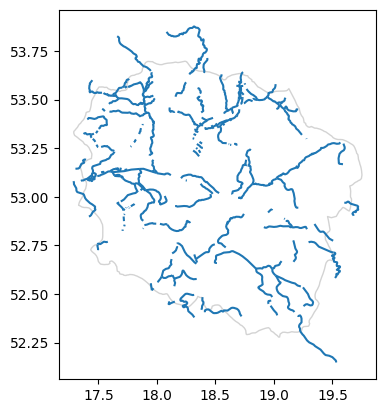

In [127]:
k_p = pl_adm1[pl_adm1['NAME_1'] == 'Kuyavian-Pomeranian']
k_p_rivers = pl_water_lines.intersects(k_p.geometry.iloc[0])
k_p_rivers = pl_water_lines[k_p_rivers]
fig = k_p.plot(color='none', edgecolor='lightgray')
k_p_rivers.plot(ax=fig)

In [22]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
line1 = LineString([(0, 0), (2, 0)]) # True
line2 = LineString([(3, 3), (2, 2)]) # True
line3 = LineString([(3, 1), (2, 1)]) # True
line4 = LineString([(3, 1), (-1, 1)]) # True
line5 = LineString([(3, 3), (4, 4)]) # False

print(f"Does line1 intersects with polygon: {line1.intersects(polygon)} \nShould be True\n")
print(f"Does line2 intersects with polygon: {line2.intersects(polygon)} \nShould be True\n")
print(f"Does line3 intersects with polygon: {line3.intersects(polygon)} \nShould be True\n")
print(f"Does line4 intersects with polygon: {line4.intersects(polygon)} \nShould be True\n")
print(f"Does line5 intersects with polygon: {line5.intersects(polygon)} \nShould be False\n")


Does line1 intersects with polygon: True 
Should be True

Does line2 intersects with polygon: True 
Should be True

Does line3 intersects with polygon: True 
Should be True

Does line4 intersects with polygon: True 
Should be True

Does line5 intersects with polygon: False 
Should be False



### Obszar

In [53]:
polygon1 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # primary
polygon2 = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # equal
polygon3 = Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)]) # contain
polygon4 = Polygon([(-1, -1), (3, -1), (3, 3), (-1, 3)]) # overlap
polygon5 = Polygon([(1, 1), (3, 1), (3, 3), (1, 3)]) # intersect
polygon6 = Polygon([(2, 2), (0, 2), (0, 4), (2, 4)]) # touches side
polygon7 = Polygon([(2, 2), (3, 2), (3, 3), (2, 3)]) # touches point
polygon8 = Polygon([(3, 3), (5, 3), (5, 5), (3, 5)]) # disjoint

#### Pole powierzchni

In [134]:
pl_adm0_km = pl_adm0.to_crs(epsg=6933)
pl_adm1_km = pl_adm1.to_crs(epsg=6933)
pl_adm2_km = pl_adm2.to_crs(epsg=6933)

areas_country = pl_adm0_km.area / 1000**2
areas_country = sum(areas_country)
areas_voivodeship = pl_adm1_km.area / 1000**2
areas_voivodeship = sum(areas_voivodeship)
areas_counties = pl_adm2_km.area / 1000**2
areas_counties = sum(areas_counties)

print(f"Pole powierzchni kraju: {areas_country}")
print(f"Pole powierzhcni województw: {areas_voivodeship}")
print(f"Pole powierzchni powiatów: {areas_counties}")

Pole powierzchni kraju: 312152.4981005015
Pole powierzhcni województw: 312152.49810050364
Pole powierzchni powiatów: 312152.49810050306


In [23]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)]) # 4

print(f"Area of a polygon: {polygon.area} \nShould be 4\n")

Area of a polygon: 4.0 
Should be 4



#### Czy punkt jest zawarty w obszarze

In [24]:
polygon = Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])
point_in = Point(1, 1) # True
point_on = Point(2, 1) # True
point_out1 = Point(3, 1) # False
point_out2 = Point(3, 3) # False

print(f"Is point_in in the polygon: {polygon.intersects(point_in)} \nShould be True\n")
print(f"Is point_on in the polygon: {polygon.intersects(point_on)} \nShould be True\n")
print(f"Is point_out1 in the polygon: {polygon.intersects(point_out1)} \nShould be False\n")
print(f"Is point_out2 in the polygon: {polygon.intersects(point_out2)} \nShould be False\n")

Is point_in in the polygon: True 
Should be True

Is point_on in the polygon: True 
Should be True

Is point_out1 in the polygon: False 
Should be False

Is point_out2 in the polygon: False 
Should be False



#### Nakładanie dwóch obszarów

In [54]:
print(f"Is polygon2 intersecting with the polygon1: {polygon1.intersects(polygon2)} \nShould be True\n")
print(f"Is polygon3 intersecting with the polygon1: {polygon1.intersects(polygon3)} \nShould be True\n")
print(f"Is polygon4 intersecting with the polygon1: {polygon1.intersects(polygon4)} \nShould be True\n")
print(f"Is polygon5 intersecting with the polygon1: {polygon1.intersects(polygon5)} \nShould be True\n")
print(f"Is polygon6 intersecting with the polygon1: {polygon1.intersects(polygon6)} \nShould be True\n")
print(f"Is polygon7 intersecting with the polygon1: {polygon1.intersects(polygon7)} \nShould be True\n")
print(f"Is polygon8 intersecting with the polygon1: {polygon1.intersects(polygon8)} \nShould be False\n")

Is polygon2 intersecting with the polygon1: True 
Should be True

Is polygon3 intersecting with the polygon1: True 
Should be True

Is polygon4 intersecting with the polygon1: True 
Should be True

Is polygon5 intersecting with the polygon1: True 
Should be True

Is polygon6 intersecting with the polygon1: True 
Should be True

Is polygon7 intersecting with the polygon1: True 
Should be False

Is polygon8 intersecting with the polygon1: False 
Should be False



#### Przecięcie dwóch obszarów

In [55]:
print(f"Intersection of polygon2 with the polygon1: {polygon1.intersection(polygon2)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Intersection of polygon3 with the polygon1: {polygon1.intersection(polygon3)} \nShould be Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])\n")
print(f"Intersection of polygon4 with the polygon1: {polygon1.intersection(polygon4)} \nShould be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])\n")
print(f"Intersection of polygon5 with the polygon1: {polygon1.intersection(polygon5)} \nShould be Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])\n")
print(f"Intersection of polygon6 with the polygon1: {polygon1.intersection(polygon6)} \nShould be LineString([(2, 2), (0, 2)])\n")
print(f"Intersection of polygon7 with the polygon1: {polygon1.intersection(polygon7)} \nShould be Point(2, 2)\n")
print(f"Intersection of polygon8 with the polygon1: {polygon1.intersection(polygon8)} \nShould be Empty\n")

Intersection of polygon2 with the polygon1: POLYGON ((0 0, 0 2, 2 2, 2 0, 0 0)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Intersection of polygon3 with the polygon1: POLYGON ((0.5 1.5, 1.5 1.5, 1.5 0.5, 0.5 0.5, 0.5 1.5)) 
Should be Polygon([(0.5, 0.5), (1.5, 0.5), (1.5, 1.5), (0.5, 1.5)])

Intersection of polygon4 with the polygon1: POLYGON ((0 2, 2 2, 2 0, 0 0, 0 2)) 
Should be Polygon([(0, 0), (2, 0), (2, 2), (0, 2)])

Intersection of polygon5 with the polygon1: POLYGON ((2 2, 2 1, 1 1, 1 2, 2 2)) 
Should be Polygon([(1, 1), (2, 1), (2, 2), (1, 2)])

Intersection of polygon6 with the polygon1: LINESTRING (2 2, 0 2) 
Should be LineString([(2, 2), (0, 2)])

Intersection of polygon7 with the polygon1: POINT (2 2) 
Should be Point(2, 2)

Intersection of polygon8 with the polygon1: POLYGON EMPTY 
Should be Empty



#### Zawieranie obszarów

In [56]:
print(f"Does polygon1 contain polygon2: {polygon1.contains(polygon2)} \nShould be True\n")
print(f"Does polygon1 contain polygon3: {polygon1.contains(polygon3)} \nShould be True\n")
print(f"Does polygon1 contain polygon4: {polygon1.contains(polygon4)} \nShould be False\n")
print(f"Does polygon1 contain polygon5: {polygon1.contains(polygon5)} \nShould be False\n")
print(f"Does polygon1 contain polygon6: {polygon1.contains(polygon6)} \nShould be False\n")
print(f"Does polygon1 contain polygon7: {polygon1.contains(polygon7)} \nShould be False\n")
print(f"Does polygon1 contain polygon8: {polygon1.contains(polygon8)} \nShould be False\n")

Does polygon1 contain polygon2: True 
Should be True

Does polygon1 contain polygon3: True 
Should be True

Does polygon1 contain polygon4: False 
Should be False

Does polygon1 contain polygon5: False 
Should be False

Does polygon1 contain polygon6: False 
Should be False

Does polygon1 contain polygon7: False 
Should be False

Does polygon1 contain polygon8: False 
Should be False



In [60]:
print(f"Is polygon1 within polygon2: {polygon1.within(polygon2)} \nShould be True\n")
print(f"Is polygon1 within polygon3: {polygon1.within(polygon3)} \nShould be False\n")
print(f"Is polygon1 within polygon4: {polygon1.within(polygon4)} \nShould be True\n")
print(f"Is polygon1 within polygon5: {polygon1.within(polygon5)} \nShould be False\n")
print(f"Is polygon1 within polygon6: {polygon1.within(polygon6)} \nShould be False\n")
print(f"Is polygon1 within polygon7: {polygon1.within(polygon7)} \nShould be False\n")
print(f"Is polygon1 within polygon8: {polygon1.within(polygon8)} \nShould be False\n")

Is polygon1 within polygon2: True 
Should be True

Is polygon1 within polygon3: False 
Should be True

Is polygon1 within polygon4: True 
Should be False

Is polygon1 within polygon5: False 
Should be False

Is polygon1 within polygon6: False 
Should be False

Is polygon1 within polygon7: False 
Should be False

Is polygon1 within polygon8: False 
Should be False



#### Pokrywanie

In [57]:
print(f"Does polygon1 cover polygon2: {polygon1.covers(polygon2)} \nShould be True\n")
print(f"Does polygon1 cover polygon3: {polygon1.covers(polygon3)} \nShould be True\n")
print(f"Does polygon1 cover polygon4: {polygon1.covers(polygon4)} \nShould be False\n")
print(f"Does polygon1 cover polygon5: {polygon1.covers(polygon5)} \nShould be False\n")
print(f"Does polygon1 cover polygon6: {polygon1.covers(polygon6)} \nShould be False\n")
print(f"Does polygon1 cover polygon7: {polygon1.covers(polygon7)} \nShould be False\n")
print(f"Does polygon1 cover polygon8: {polygon1.covers(polygon8)} \nShould be False\n")

Does polygon1 cover polygon2: True 
Should be True

Does polygon1 cover polygon3: True 
Should be True

Does polygon1 cover polygon4: False 
Should be False

Does polygon1 cover polygon5: False 
Should be False

Does polygon1 cover polygon6: False 
Should be False

Does polygon1 cover polygon7: False 
Should be False

Does polygon1 cover polygon8: False 
Should be False



In [58]:
print(f"Is polygon1 covered by polygon2: {polygon1.covered_by(polygon2)} \nShould be True\n")
print(f"Is polygon1 covered by polygon3: {polygon1.covered_by(polygon3)} \nShould be False\n")
print(f"Is polygon1 covered by polygon4: {polygon1.covered_by(polygon4)} \nShould be True\n")
print(f"Is polygon1 covered by polygon5: {polygon1.covered_by(polygon5)} \nShould be False\n")
print(f"Is polygon1 covered by polygon6: {polygon1.covered_by(polygon6)} \nShould be False\n")
print(f"Is polygon1 covered by polygon7: {polygon1.covered_by(polygon7)} \nShould be False\n")
print(f"Is polygon1 covered by polygon8: {polygon1.covered_by(polygon8)} \nShould be False\n")

Is polygon1 covered by polygon2: True 
Should be True

Is polygon1 covered by polygon3: False 
Should be True

Is polygon1 covered by polygon4: True 
Should be False

Is polygon1 covered by polygon5: False 
Should be False

Is polygon1 covered by polygon6: False 
Should be False

Is polygon1 covered by polygon7: False 
Should be False

Is polygon1 covered by polygon8: False 
Should be False



#### Dotykanie obszarów

In [63]:
print(f"Is polygon1 touching polygon2: {polygon1.touches(polygon2)} \nShould be False\n")
print(f"Is polygon1 touching polygon3: {polygon1.touches(polygon3)} \nShould be False\n")
print(f"Is polygon1 touching polygon4: {polygon1.touches(polygon4)} \nShould be False\n")
print(f"Is polygon1 touching polygon5: {polygon1.touches(polygon5)} \nShould be False\n")
print(f"Is polygon1 touching polygon6: {polygon1.touches(polygon6)} \nShould be True\n")
print(f"Is polygon1 touching polygon7: {polygon1.touches(polygon7)} \nShould be True\n")
print(f"Is polygon1 touching polygon8: {polygon1.touches(polygon8)} \nShould be False\n")

Is polygon1 touching polygon2: False 
Should be False

Is polygon1 touching polygon3: False 
Should be False

Is polygon1 touching polygon4: False 
Should be False

Is polygon1 touching polygon5: False 
Should be False

Is polygon1 touching polygon6: True 
Should be True

Is polygon1 touching polygon7: True 
Should be True

Is polygon1 touching polygon8: False 
Should be False



#### Brak punktów wspólnych między obszarami

In [62]:
print(f"Are polygon1 and polygon2 disjoint: {polygon1.disjoint(polygon2)} \nShould be False\n")
print(f"Are polygon1 and polygon3 disjoint: {polygon1.disjoint(polygon3)} \nShould be False\n")
print(f"Are polygon1 and polygon4 disjoint: {polygon1.disjoint(polygon4)} \nShould be False\n")
print(f"Are polygon1 and polygon5 disjoint: {polygon1.disjoint(polygon5)} \nShould be False\n")
print(f"Are polygon1 and polygon6 disjoint: {polygon1.disjoint(polygon6)} \nShould be False\n")
print(f"Are polygon1 and polygon7 disjoint: {polygon1.disjoint(polygon7)} \nShould be False\n")
print(f"Are polygon1 and polygon8 disjoint: {polygon1.disjoint(polygon8)} \nShould be True\n")

Are polygon1 and polygon2 disjoint: False 
Should be False

Are polygon1 and polygon3 disjoint: False 
Should be False

Are polygon1 and polygon4 disjoint: False 
Should be False

Are polygon1 and polygon5 disjoint: False 
Should be False

Are polygon1 and polygon6 disjoint: False 
Should be False

Are polygon1 and polygon7 disjoint: False 
Should be False

Are polygon1 and polygon8 disjoint: True 
Should be True



## Inne

<Axes: >

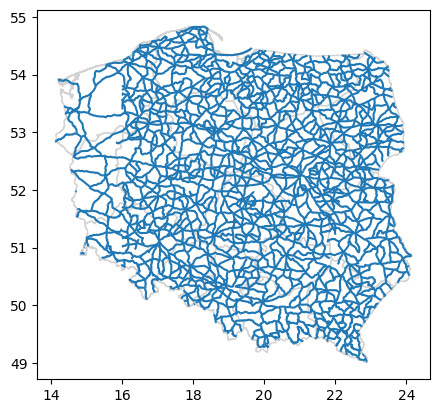

In [65]:
fig = pl_adm1.plot(color='none', edgecolor='lightgray')
pl_roads.plot(ax=fig)